In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
df = pd.read_csv('data/clean_data.csv')

In [23]:
df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,amazfit,ambrane,...,Fluoroelastomer,Leather,Metal,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.018733,0.161844,0.825,0.033575,0.129412,0.037862,0.772727,0.289239,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.005764,0.066733,0.700,0.035086,0.341176,0.035635,0.409091,0.615601,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.004323,0.193516,0.825,0.021390,0.129412,0.037862,1.000000,0.062882,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.002882,0.035156,0.775,0.022451,0.341176,0.035635,0.409091,0.732899,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0.002162,0.024599,0.750,0.052821,0.341176,0.035635,0.409091,0.773643,False,False,...,False,False,False,True,False,False,False,False,False,False


In [24]:
X = df.drop('Discount Price', axis=1)
Y = df['Discount Price']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
lr_y_pred = lr_model.predict(X_test)

res = r2_score(Y_test, lr_y_pred)
print(res)

0.346816154873019


In [27]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)
dt_y_pred = dt_model.predict(X_test)

res = r2_score(Y_test, dt_y_pred)
print(res)

0.7182594984170197


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
rf_y_pred = rf_model.predict(X_test)

res = r2_score(Y_test, rf_y_pred)
print(res)


0.7724366397495139


In [29]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, Y_train)
xgb_y_pred = xgb_model.predict(X_test)

res = r2_score(Y_test, xgb_y_pred)
print(res)

0.8086321643178169


In [33]:
dt_score = cross_val_score(dt_model, X, Y, cv=5, scoring='r2')
print(dt_score, dt_score.mean(), dt_score.std())

[ 0.50439254  0.30997809  0.49608687 -0.04998399  0.81531077] 0.41515685570802896 0.28356812574643486


In [34]:
rf_score = cross_val_score(rf_model, X, Y, cv=5, scoring='r2')
print(rf_score, rf_score.mean(), rf_score.std())

[0.78804769 0.69102438 0.50704142 0.18344977 0.83854329] 0.6016213097811007 0.23777826492903473


In [35]:
xgb_score = cross_val_score(xgb_model, X, Y, cv=5, scoring='r2')
print(xgb_score, xgb_score.mean(), xgb_score.std())

[0.81951677 0.74506616 0.55837844 0.31175435 0.89961518] 0.6668661811817309 0.21045832598582237


In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, Y_train)

best_y_pred = best_model.predict(X_test)
best_r2 = r2_score(Y_test, best_y_pred)

print("Best Parameters:", best_params)
print("Best R2 Score:", best_r2)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best R2 Score: 0.7773498972162836


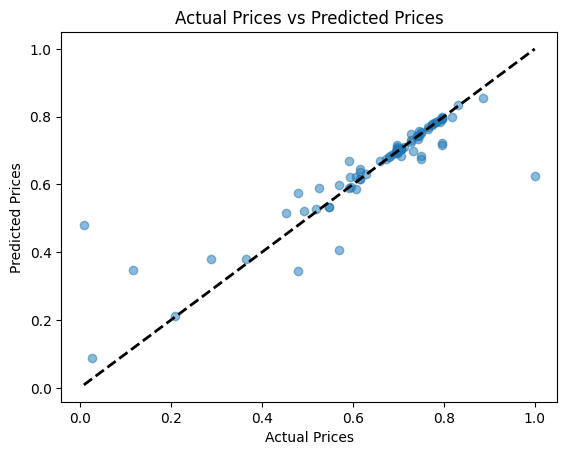

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(Y_test, best_y_pred, alpha = 0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [43]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)